# Speed Calculation

## Setups

####  Import Python Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import xml.etree.ElementTree as etree 
from datetime import datetime
import os
import json
import pandas as pd
import numpy as np
from collections import Counter

#### Handle File Names and Paths

In [2]:
#input_file_path :  this is full path descriptor of input file

input_dir = os.path.join("/", "opt","jupyter","data","csv" )
input_file = 'activity_speed' + '.csv'
input_file_path = os.path.join(input_dir , input_file)

print ("Input file is (full path)  ", input_file_path)

Input file is (full path)   /opt/jupyter/data/csv/activity_speed.csv


#### Create Pandas DataFrame 

In [3]:
df = pd.read_csv(input_file_path, index_col = 'time',  parse_dates=True)

## Preview the DataFrame Data

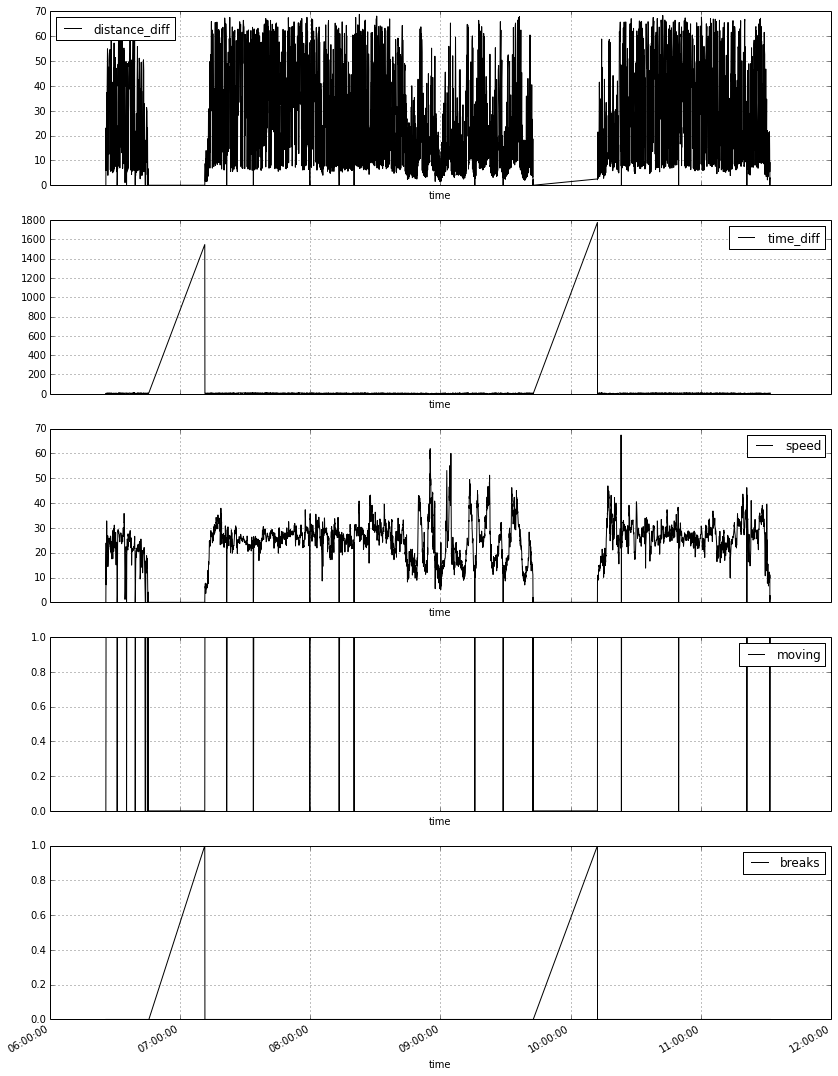

In [4]:
#plot all columns
_ = df.plot(subplots=True, 
        figsize=(14, 20),
         xlim=(datetime(2015,9,13,6,0,0),datetime(2015,9,13,12,0,0 )),
        )


In [5]:
# view first few rows
df.head()

,distance_diff,time_diff,speed,moving,breaks
time,,,,,
2015-09-13 06:25:51,0.000000,1,0.0,False,False
2015-09-13 06:25:56,23.080000,5,16.6,True,False
2015-09-13 06:25:57,6.650002,1,23.9,True,False
2015-09-13 06:26:00,5.910000,3,7.1,True,False
2015-09-13 06:26:03,11.439999,3,13.7,True,False


In [6]:
# get statistical summary
df.describe()

,distance_diff,time_diff,speed,moving,breaks
count,5358.000000,5358.000000,5358.000000,5358,5358
mean,19.660904,3.428891,25.820063,0.9925345,0.0003732736
std,18.063191,32.195810,9.102339,0.08608787,0.01931849
min,0.000000,1.000000,0.000000,False,False
25%,6.931396,1.000000,20.300000,1,0
50%,11.113281,1.000000,25.900000,1,0
75%,28.084473,4.000000,30.800000,1,0
max,68.839844,1775.000000,67.400000,True,True


## Speed Analysis

### Plot Speed Data
Plot the speed data for all data points

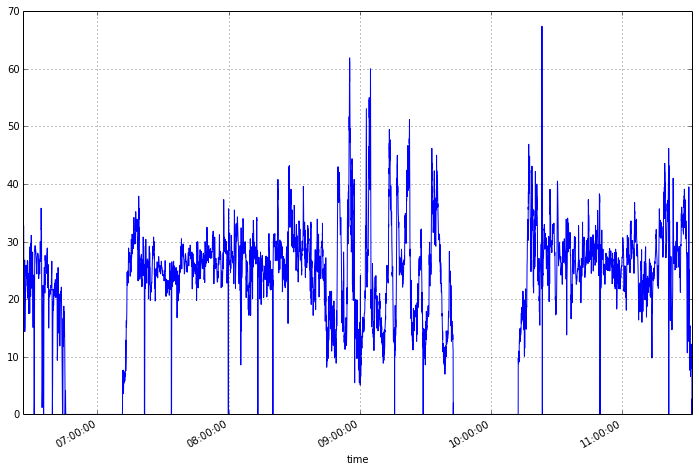

In [7]:
_ = df['speed'].plot(figsize=(12,8),)

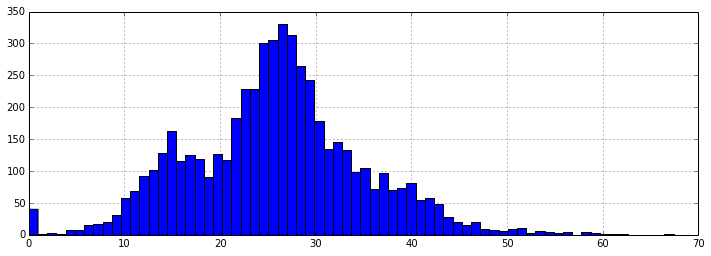

In [8]:
df['speed'].hist(bins=70,
                figsize=(12,4),)

### Check data points were speed close to maximum

In [9]:
#speed greater than 60
df[df['speed'] > 60.0]

,distance_diff,time_diff,speed,moving,breaks
time,,,,,
2015-09-13 08:55:16,16.921875,1,60.9,True,False
2015-09-13 08:55:17,17.000000,1,61.2,True,False
2015-09-13 08:55:19,17.207031,1,61.9,True,False
2015-09-13 10:23:16,18.710938,1,67.4,True,False


In [10]:
for i in range(4):
    time = df[df['speed'] > 60.0].index[i] 
    index_number = df.index.get_loc ( time )
    speed = df.iloc[index_number].speed
    print ( str( index_number ) + ' is index number for data point '  + str( time )
          + ' speed is ' + str( speed ) )

2278 is index number for data point 2015-09-13 08:55:16 speed is 60.9
2279 is index number for data point 2015-09-13 08:55:17 speed is 61.2
2281 is index number for data point 2015-09-13 08:55:19 speed is 61.9
4045 is index number for data point 2015-09-13 10:23:16 speed is 67.4


Average Speed for this period 55.715
Max Speed for this period 61.9


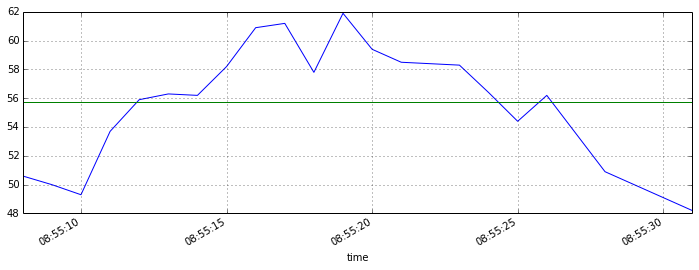

In [11]:

avg_speed = df['speed'][2280-10: 2280 +10].mean()
max_speed = df['speed'][2280-10: 2280 +10].max()

plt.figure();
df['speed'][2280-10: 2280 +10].plot(figsize=(12,4),)
plt.axhline(avg_speed, color='g')

print('Average Speed for this period ' + str(avg_speed) )
print('Max Speed for this period ' + str(max_speed) )

In [12]:
df[2280-10: 2280 +10]

,distance_diff,time_diff,speed,moving,breaks
time,,,,,
2015-09-13 08:55:08,14.058594,1,50.6,True,False
2015-09-13 08:55:09,13.902344,1,50.0,True,False
2015-09-13 08:55:10,13.707031,1,49.3,True,False
2015-09-13 08:55:11,14.921875,1,53.7,True,False
2015-09-13 08:55:12,15.519531,1,55.9,True,False
2015-09-13 08:55:13,15.628906,1,56.3,True,False
2015-09-13 08:55:14,15.601562,1,56.2,True,False
2015-09-13 08:55:15,16.167969,1,58.2,True,False
2015-09-13 08:55:16,16.921875,1,60.9,True,False


Average Speed for this period 25.315
Max Speed for this period 67.4


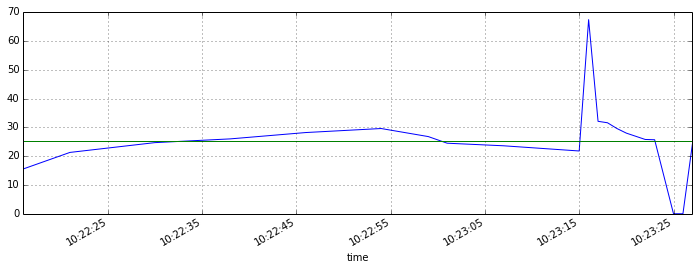

In [13]:
avg_speed = df['speed'][4045-10: 4045 +10].mean()
max_speed = df['speed'][4045-10: 4045 +10].max()

plt.figure()
df['speed'][4045-10: 4045 +10].plot(figsize=(12,4),)
plt.axhline(avg_speed, color='g')

print('Average Speed for this period ' + str(avg_speed) )
print('Max Speed for this period ' + str(max_speed) )

In [14]:
df[4045-10: 4045 +10]

,distance_diff,time_diff,speed,moving,breaks
time,,,,,
2015-09-13 10:22:16,17.179688,4,15.5,True,False
2015-09-13 10:22:21,29.554688,5,21.3,True,False
2015-09-13 10:22:30,61.867188,9,24.7,True,False
2015-09-13 10:22:38,57.718750,8,26.0,True,False
2015-09-13 10:22:46,62.664062,8,28.2,True,False
2015-09-13 10:22:54,65.734375,8,29.6,True,False
2015-09-13 10:22:59,37.289062,5,26.8,True,False
2015-09-13 10:23:01,13.601562,2,24.5,True,False
2015-09-13 10:23:07,39.390625,6,23.6,True,False
